# Building Universes

Let's solve the Friedmann equation numerically.  There are really two different ways to do it, neither of which is perfect:  integrate the equation directly, or re-write it as a differential equation and solve that numerically.  I'm going to go through the integration method, since it's more straightforward, but be careful -- it will fail in some cases.

## Integrating The Friedmann Equation

In integral form, the Friedmann equation can be written
$$
H_0 (t - t_0) = \int_1^a \frac{da}{\sqrt{\Omega_{r,0}/a^2 + \Omega_{m,0}/a + \Omega_{\lambda,0}a^2 + (1 - \Omega_0)}}.
$$
Note the integration limits -- at the bottom we have $a=1$, which is *today*.  So this integrates from today to some other time -- in the past if $a$ is less than one and in the future if $a$ is greater than one. Of course, when the upper limit is *also* one, the integral is zero, which just means $t=t_0$.  Is this confusing?  Sure, but I'll get you to fix it a bit in the next assignment.

In [2]:
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import numpy as np

# convert H0 to Gyrs
H0 = 68.0 / 3.086e+19 * (60*60*24*365*1e9)
print(f'The Hubble constant is H0 = {H0:0.4f} inverse seconds')

The Hubble constant is H0 = 0.0695 inverse seconds


Here's the workhorse -- a single function that will create a universe given the parameters passed in.  It returns two arrays:  $t$ and $a$, but be careful -- the $t$ array is *not* time, it's $H_0 (t-t_0)$ as written above.

If you're curious, I'm using SciPy's basic `quad` routine to do the heavy lifting.

I think the parameters passed in are obvious except maybe $amax$ -- that's the maximum scale factor in the upper limit of the integral, and we'll integrate 1000 times, changing the limit from zero to that value.

In [65]:
def create_universe(Omega_r0 = 9e-5, Omega_m0 = 0.31, Omega_l0 = 0.69, amax = 10):

    # total Omega
    Omega_0 = Omega_r0 + Omega_m0 + Omega_l0

    # this is the integrand
    def f(a):
        return 1.0 / np.sqrt(Omega_r0 / a**2 + Omega_m0 / a + Omega_l0 * a**2 + (1.0 - Omega_0))

    # set up the integration
    N = 100
    a = np.linspace(1e-5, amax, N)

    t = np.zeros(N)
    for i in range(N):
        t[i], err = integrate.quad(f, 1, a[i])

    return t, a

## Matter + Curvature

Let's try ...

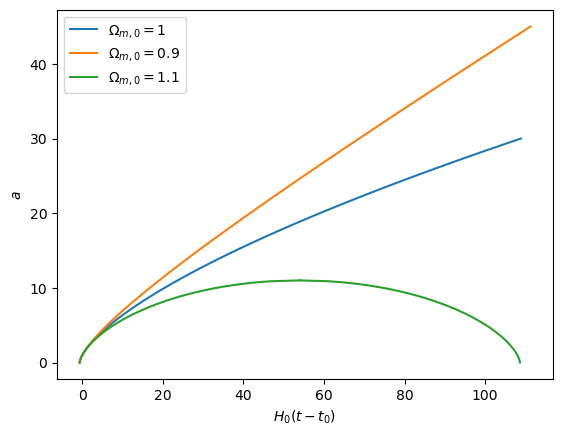

In [83]:
t, a = create_universe(Omega_r0 = 0, Omega_m0 = 1, Omega_l0 = 0, amax = 30)
plt.plot(t, a, label=r'$\Omega_{m,0} = 1$')

t,a = create_universe(Omega_r0 = 0, Omega_m0 = 0.9, Omega_l0 = 0, amax = 45)
plt.plot(t, a, label=r'$\Omega_{m,0} = 0.9$')

t,a = create_universe(Omega_r0 = 0, Omega_m0 = 1.1, Omega_l0 = 0, amax = 1.1 / 0.1)
plt.plot(t, a, label=r'$\Omega_{m,0} = 1.1$')
#print(t,a)
plt.plot(2*t[-1] - np.flip(t), np.flip(a), color='tab:green')

plt.xlabel("$H_0 (t-t_0)$")
plt.ylabel("$a$")
plt.legend()

## Matter + Lambda

And next ...

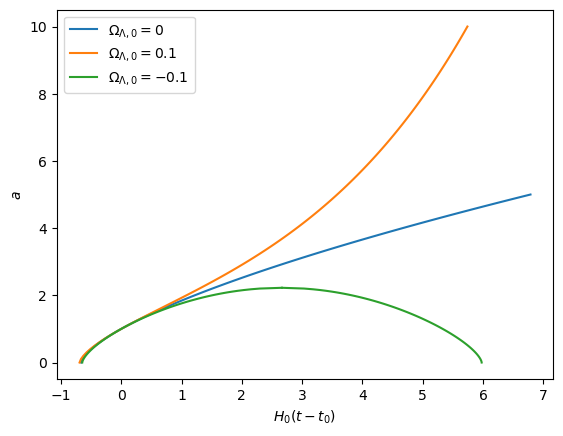

In [92]:
t, a = create_universe(Omega_r0 = 0, Omega_m0 = 1, Omega_l0 = 0, amax = 5)
plt.plot(t, a, label=r'$\Omega_{\Lambda,0} = 0$')

t,a = create_universe(Omega_r0 = 0, Omega_m0 = 0.9, Omega_l0 = 0.1, amax = 10)
plt.plot(t, a, label=r'$\Omega_{\Lambda,0} = 0.1$')

t,a = create_universe(Omega_r0 = 0, Omega_m0 = 1.1, Omega_l0 = -0.1, amax = np.power(1.1 / 0.1, 1/3))
plt.plot(t, a, label=r'$\Omega_{\Lambda,0} = -0.1$')
#print(t,a)
plt.plot(2*t[-1] - np.flip(t), np.flip(a), color='tab:green')

plt.xlabel("$H_0 (t-t_0)$")
plt.ylabel("$a$")
plt.legend()

## Benchmark

Our universe!

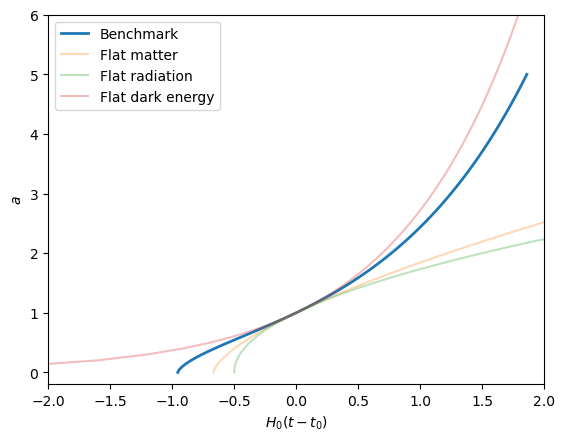

In [114]:
t, a = create_universe(Omega_r0 = 9e-5, Omega_m0 = 0.31, Omega_l0 = 0.69, amax = 5)
plt.plot(t, a, lw=2, label='Benchmark')

t, a = create_universe(Omega_r0 = 0, Omega_m0 = 1, Omega_l0 = 0, amax = 3)
plt.plot(t, a, alpha=0.3, label='Flat matter')

t, a = create_universe(Omega_r0 = 1, Omega_m0 = 0, Omega_l0 = 0, amax = 5)
plt.plot(t, a, alpha=0.3, label='Flat radiation')

t, a = create_universe(Omega_r0 = 0, Omega_m0 = 0, Omega_l0 = 1, amax = 10)
plt.plot(t, a, alpha=0.3, label='Flat dark energy')

plt.xlabel("$H_0 (t-t_0)$")
plt.ylabel("$a$")
plt.xlim(-2, 2)
plt.ylim(-0.2, 6)
plt.legend()